In [1]:
# make sure weh have access to GPU
!nvidia-smi

Mon Feb 10 08:41:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.1/235.7 GB disk)


In [4]:
# copy the API code from roboflow
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NhW39Yq4vhGd958KpFIe")
project = rf.workspace("fruits-nho6p").project("fruits-yyvkj")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [5]:
# custom training ##epochs=25## ##change to 100/200/300 when using department GPU##
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=800 plots=True


/content
New https://pypi.org/project/ultralytics/8.3.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Fruits-2/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

In [7]:
# Zip the results after training
import shutil

output_dir = "runs/detect/train2"
zip_file = "yolo_training_results.zip"
shutil.make_archive(zip_file.replace(".zip", ""), 'zip', output_dir)

print(f"Training results zipped as {zip_file}")

from google.colab import files
files.download("yolo_training_results.zip")

Training results zipped as yolo_training_results.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content


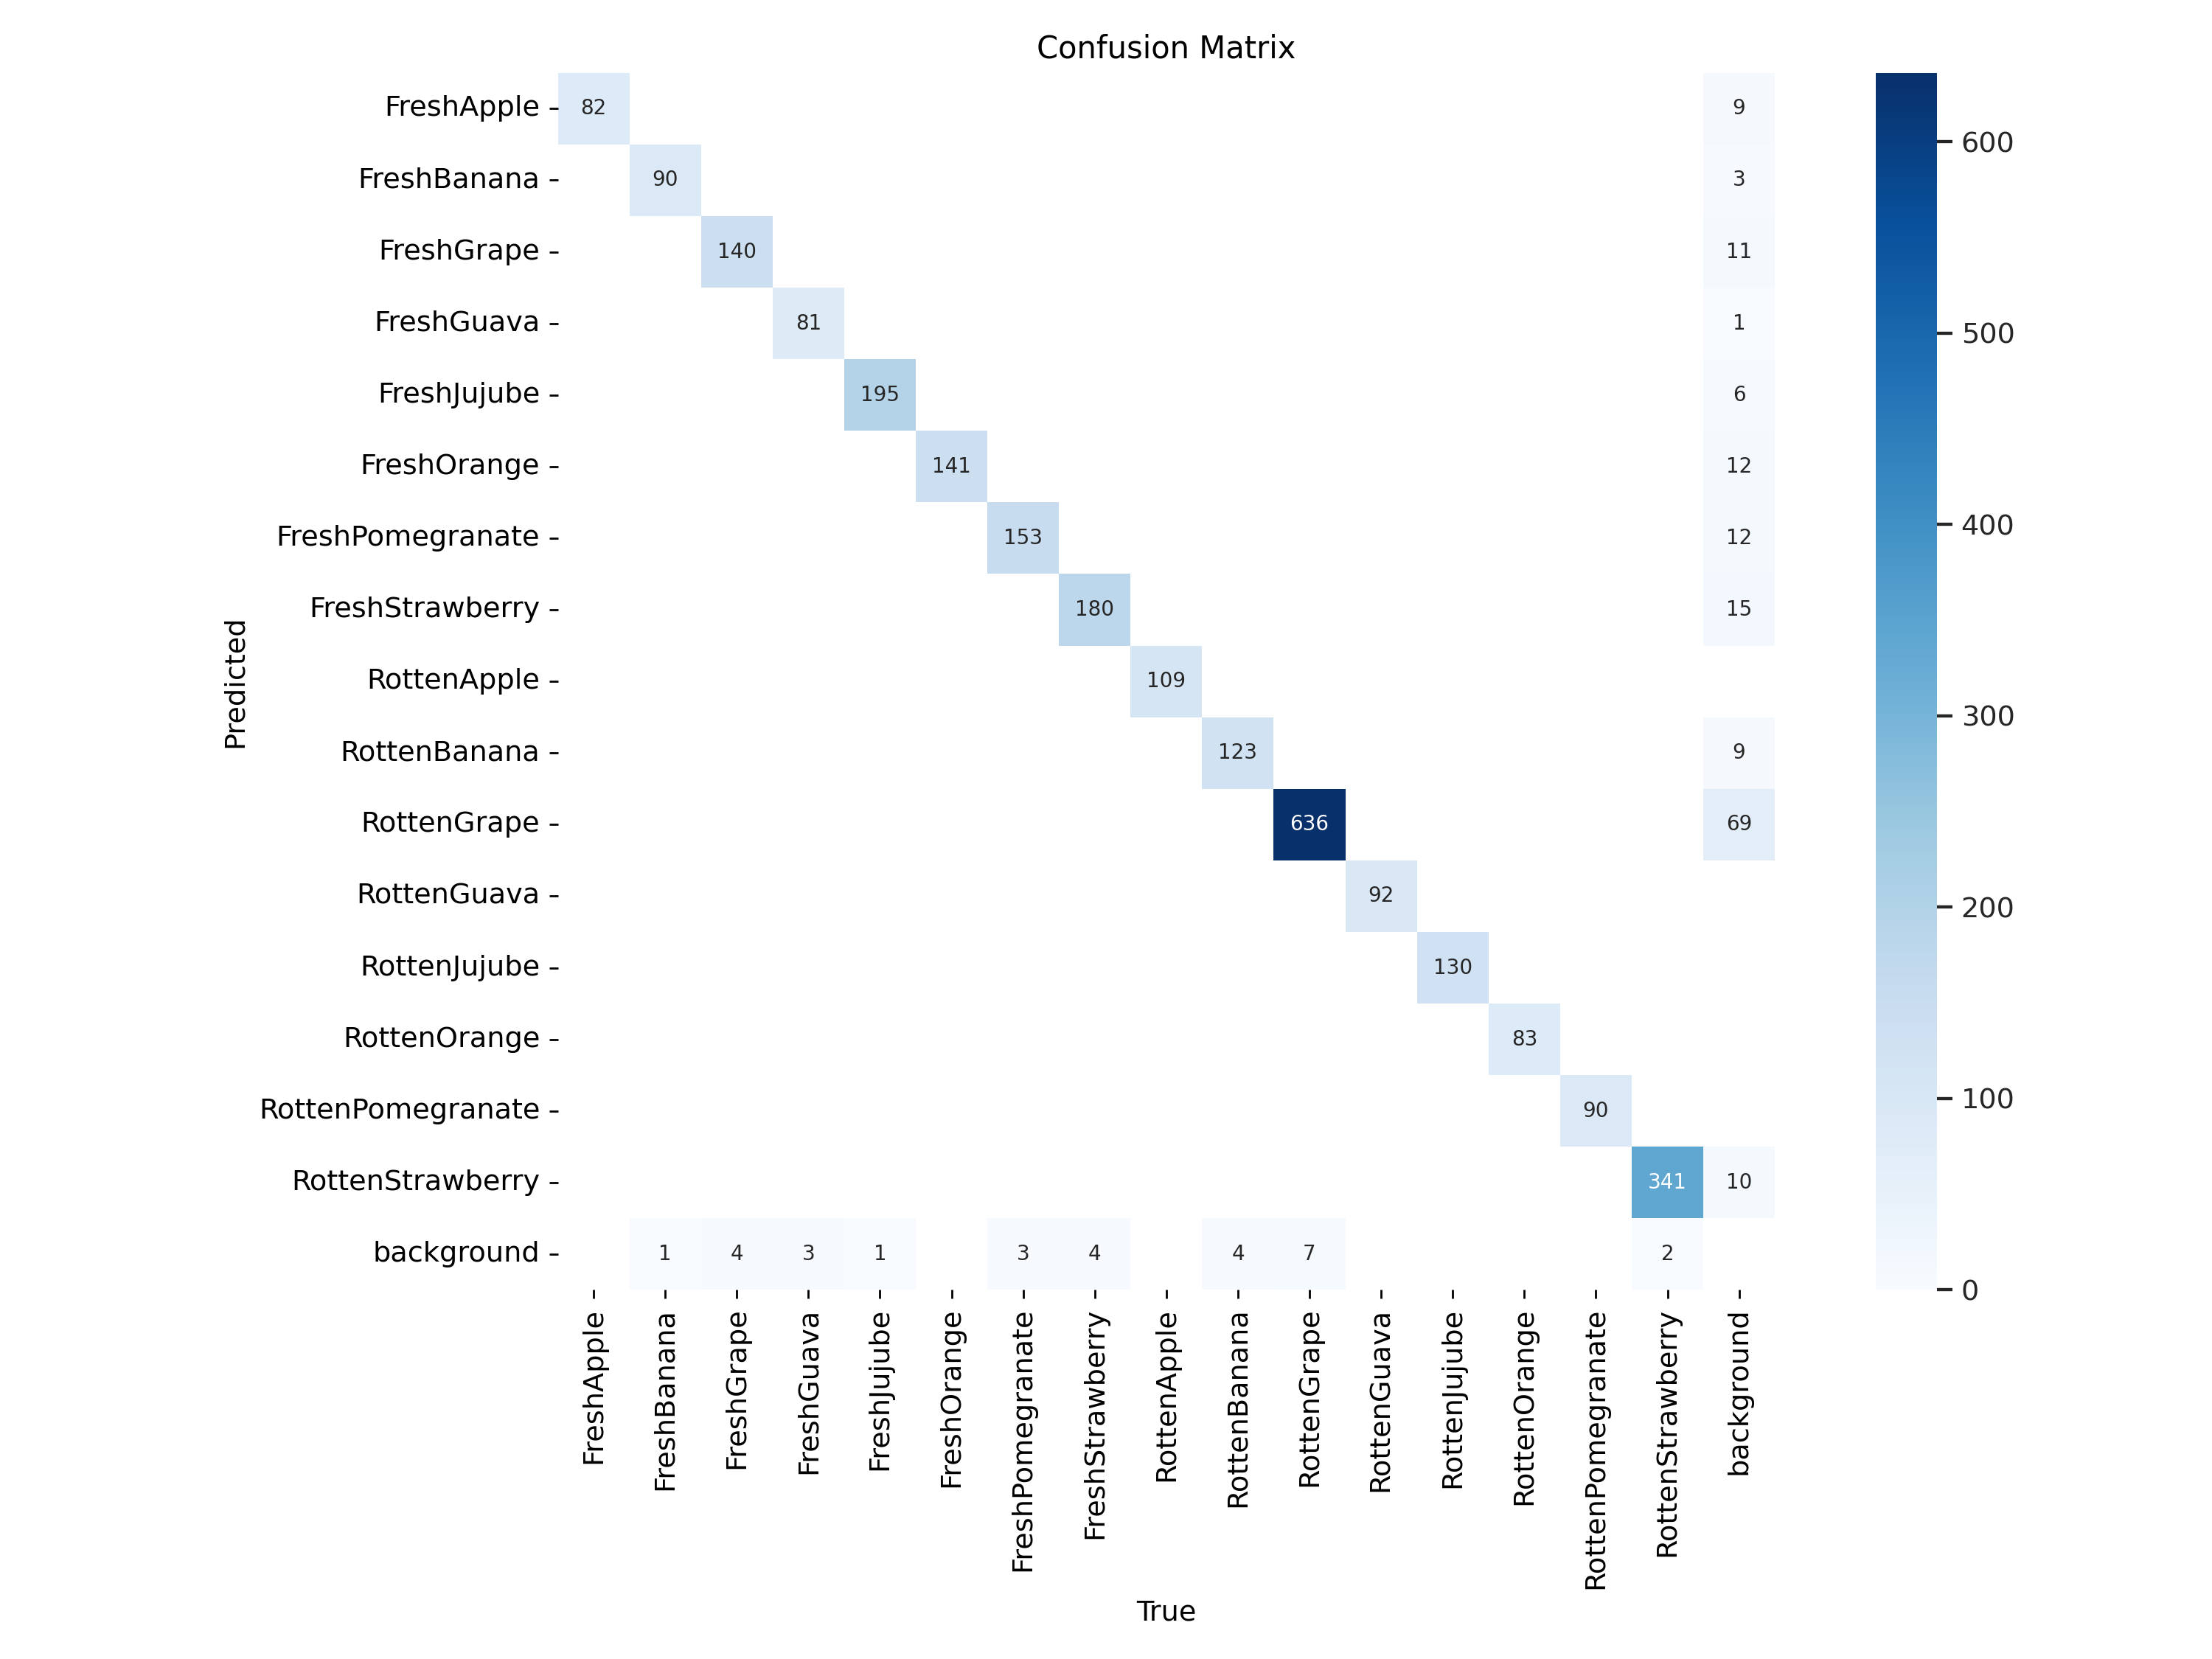

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


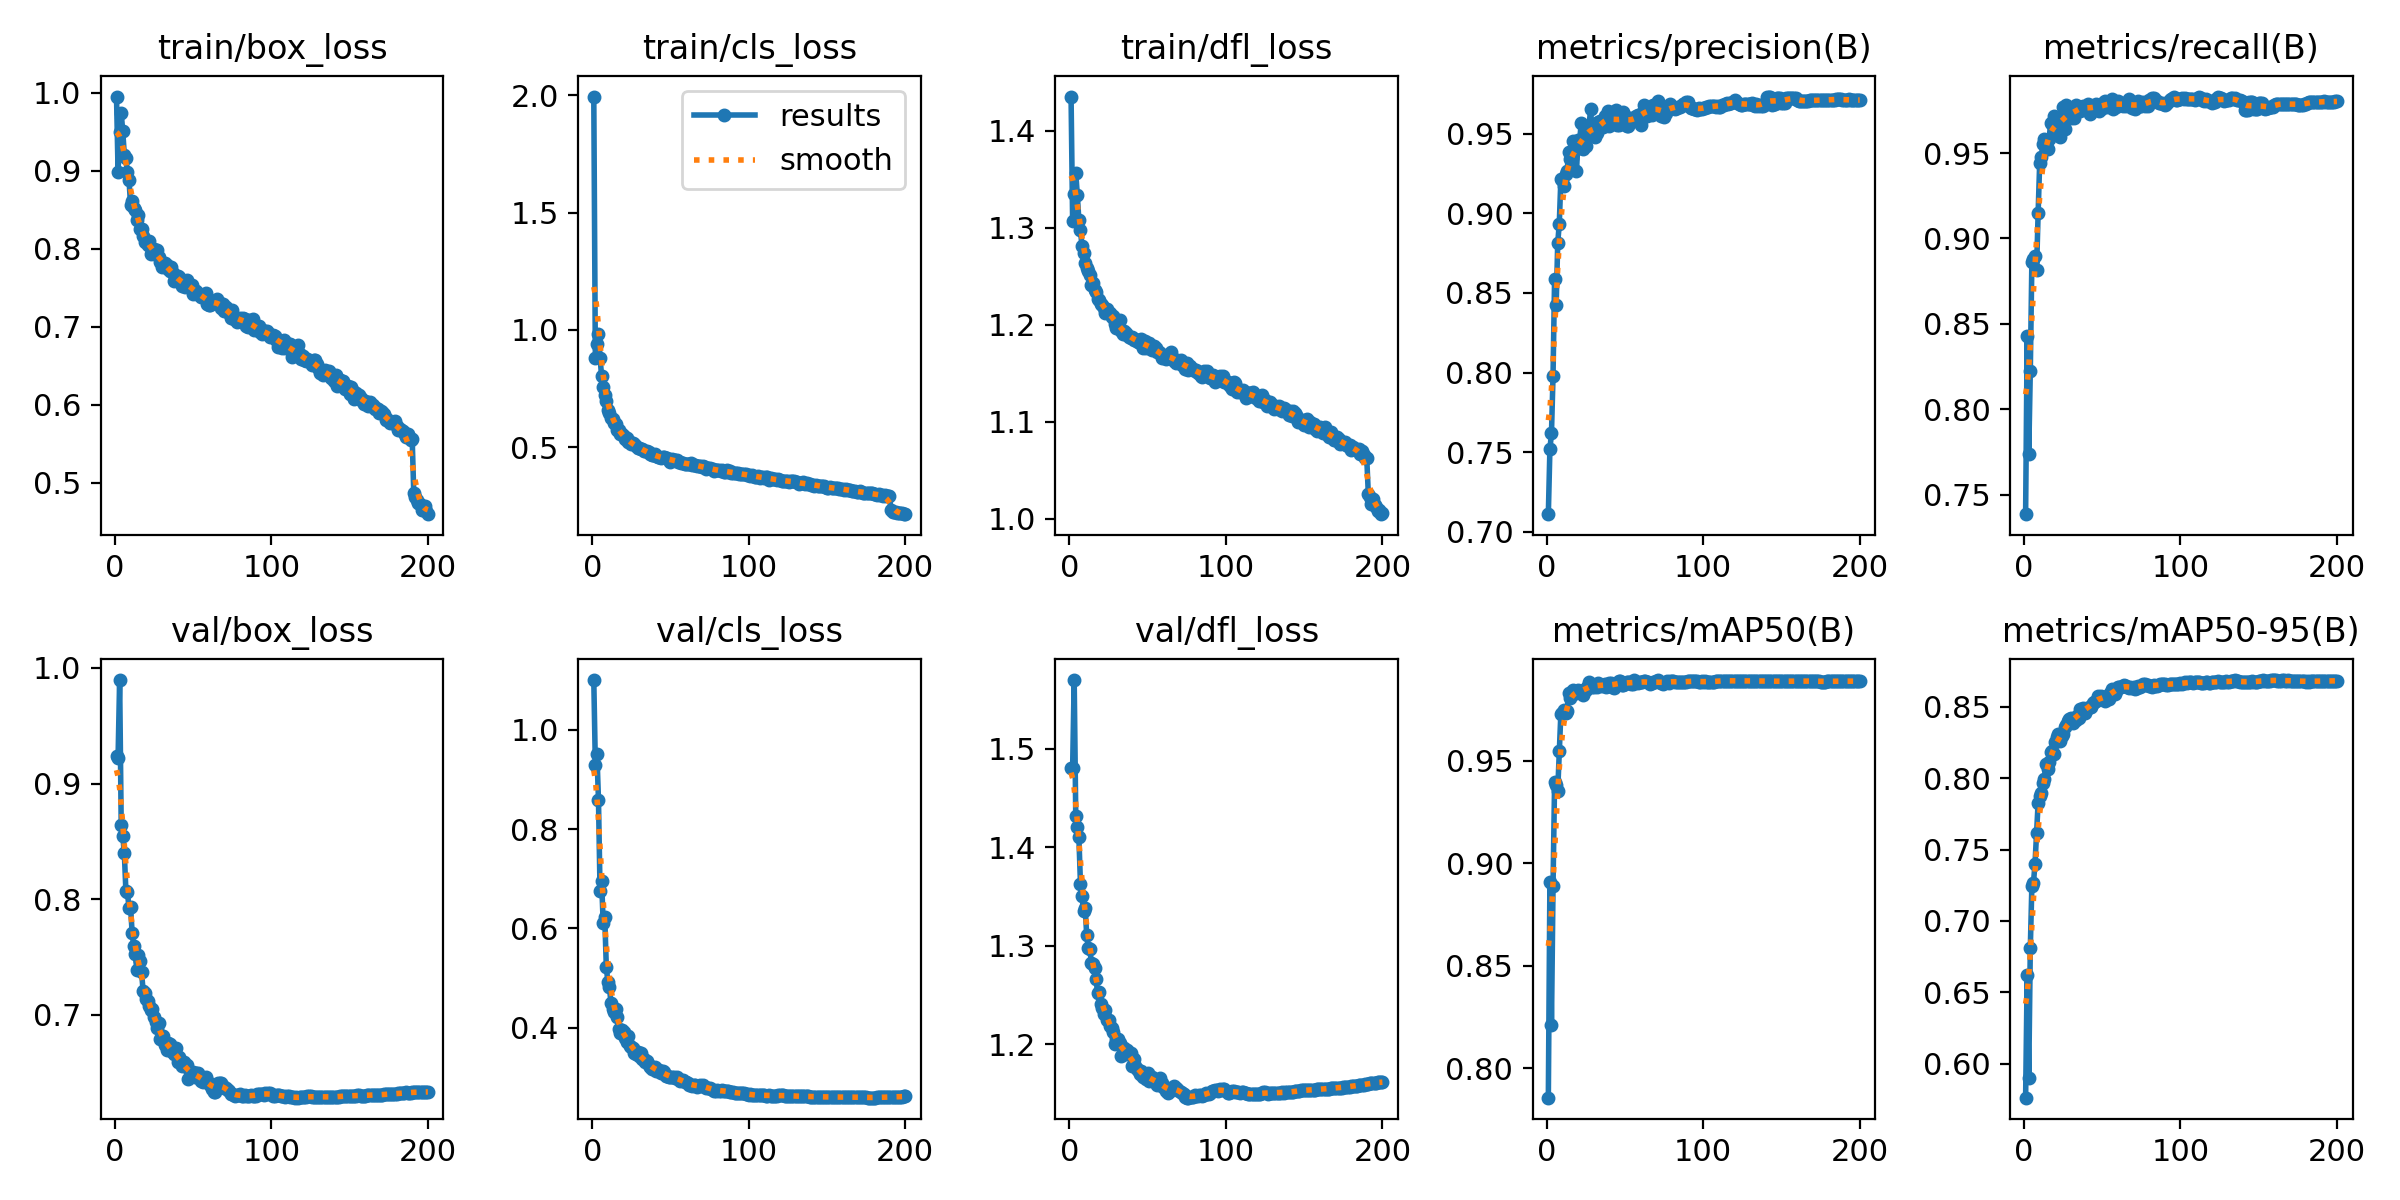

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


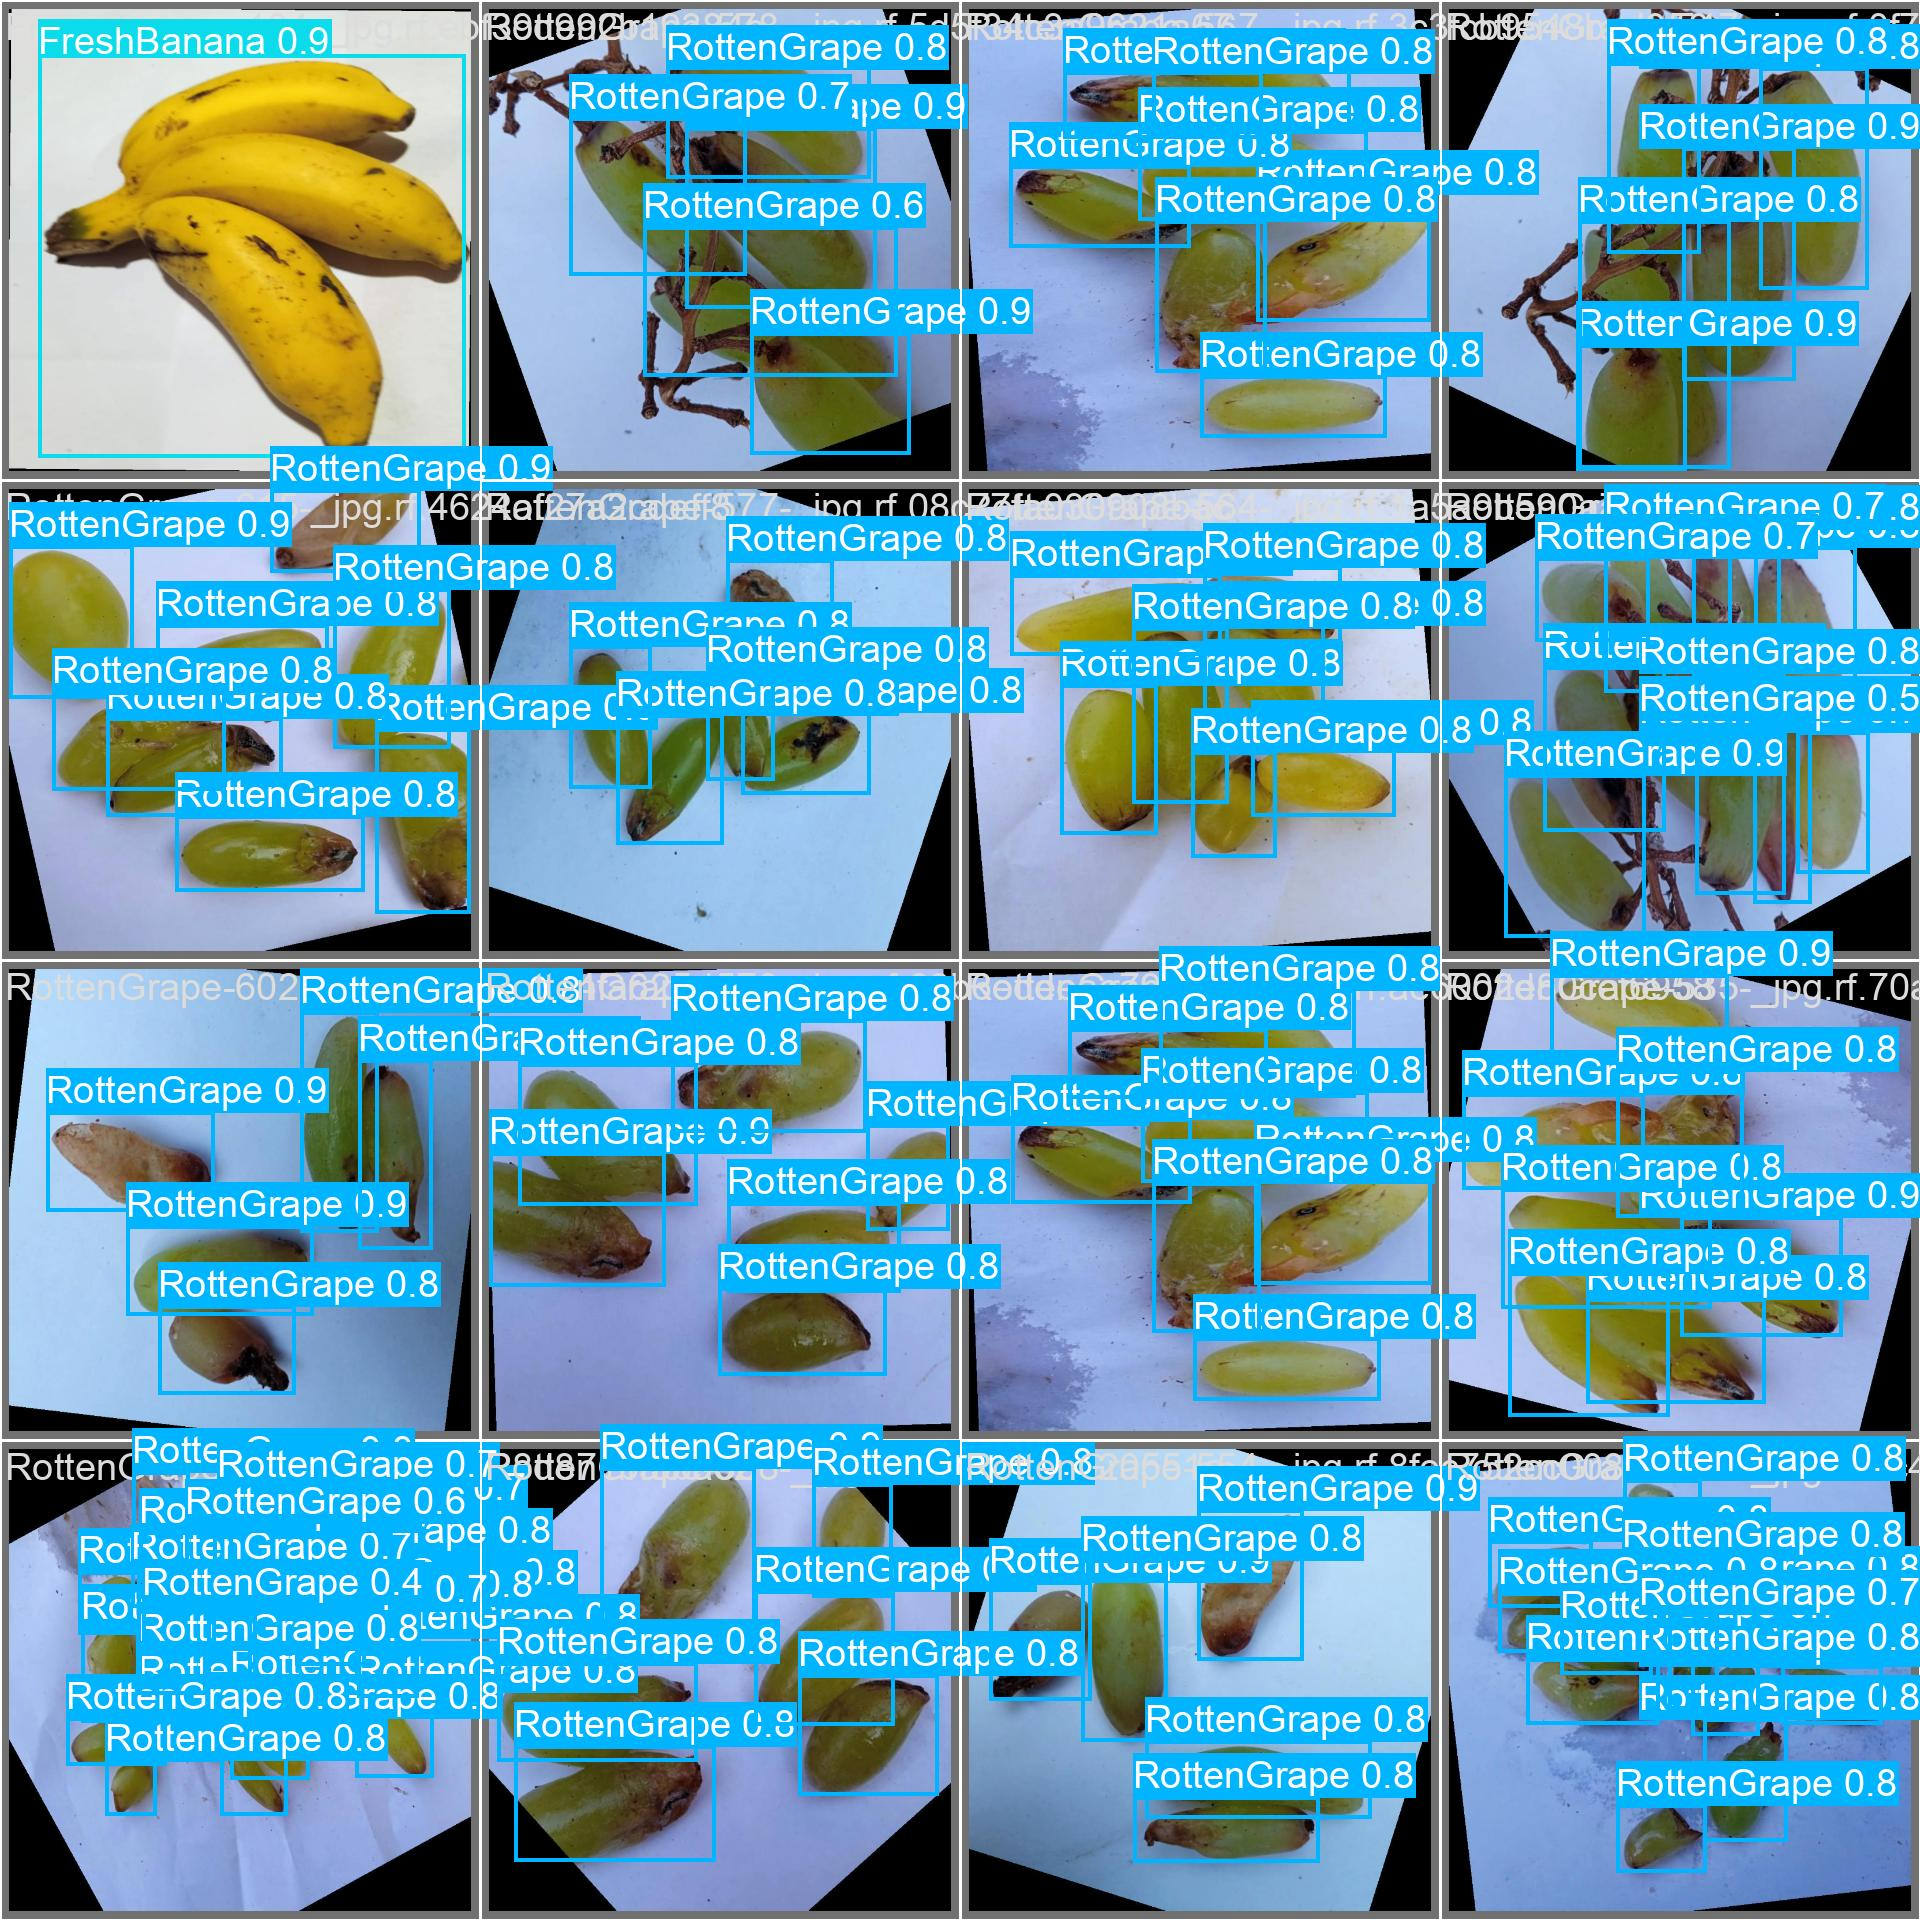

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [11]:
# validate custom model
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml


/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Fruits-2/valid/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100% 1227/1227 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 2695. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 77/77 [00:25<00:00,  3.00it/s]
                   all       1227       2695      0.973      0.977      0.989      0.869
            FreshApple         55         82      0.955          1      0.994      0.963
           FreshBanana         79         91      0.955      0.978      0.966      0.892
            FreshGrap

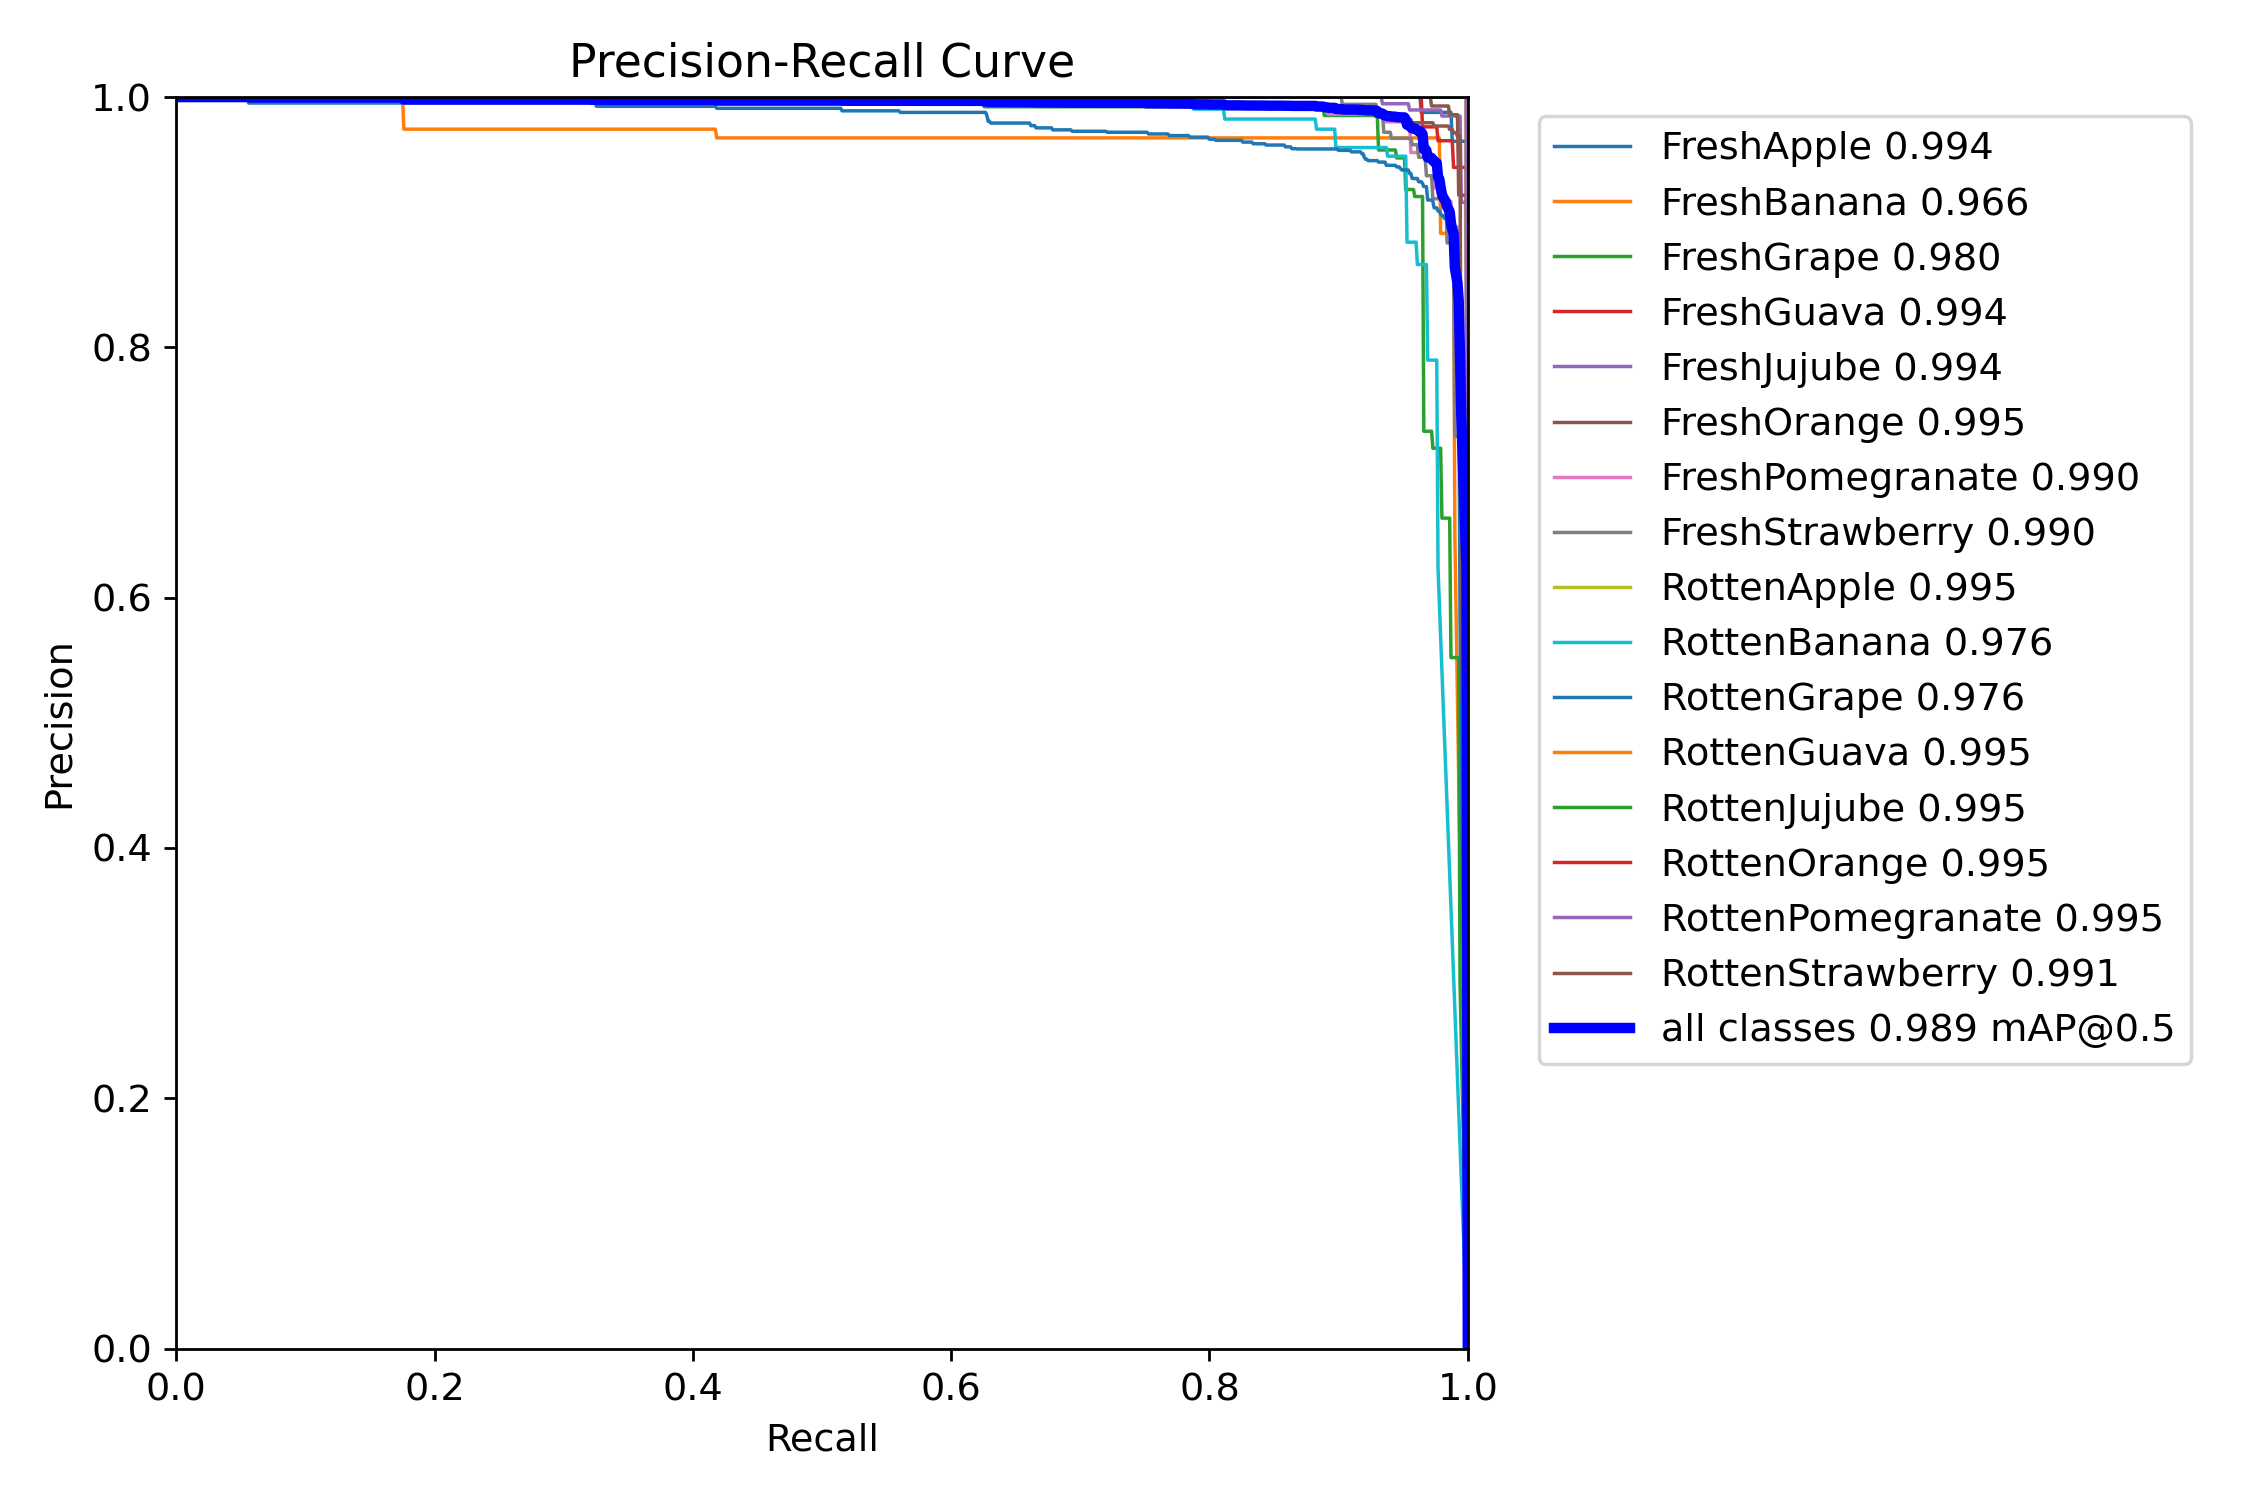

In [12]:
# Display Precision-Recall Curve
from IPython.display import Image, display

# PR Curve path
pr_curve_path = f'{HOME}/runs/detect/train2/PR_curve.png'

# Display the PR Curve
if os.path.exists(pr_curve_path):
    display(Image(filename=pr_curve_path, width=600))
else:
    print("Precision-Recall curve not found. Check the training output folder.")

In [13]:
# inference with custom model
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/1237 /content/datasets/Fruits-2/test/images/FreshBanana-100-_jpg.rf.d6874e675d42a74e87ddda101dc32428.jpg: 800x800 2 FreshBananas, 22.9ms
image 2/1237 /content/datasets/Fruits-2/test/images/FreshBanana-102-_jpg.rf.843c6fa5136e97ed31a94ddee8bccf38.jpg: 800x800 1 FreshBanana, 22.9ms
image 3/1237 /content/datasets/Fruits-2/test/images/FreshBanana-115-_jpg.rf.b0ac8c900cb830160f80fbb6c0b337b6.jpg: 800x800 1 FreshBanana, 22.9ms
image 4/1237 /content/datasets/Fruits-2/test/images/FreshBanana-118-_jpg.rf.91fe7a61f9b57b921c3fcc36987dd5e0.jpg: 800x800 1 FreshBanana, 22.9ms
image 5/1237 /content/datasets/Fruits-2/test/images/FreshBanana-119-_jpg.rf.ba7e1e7e18ef8110828cda6ec012a70a.jpg: 800x800 1 FreshBanana, 22.9ms
image 6/1237 /content/datasets/Fruits-2/test/images/FreshBanana-143-_jpg.rf.dca4384b09979c3df30e10

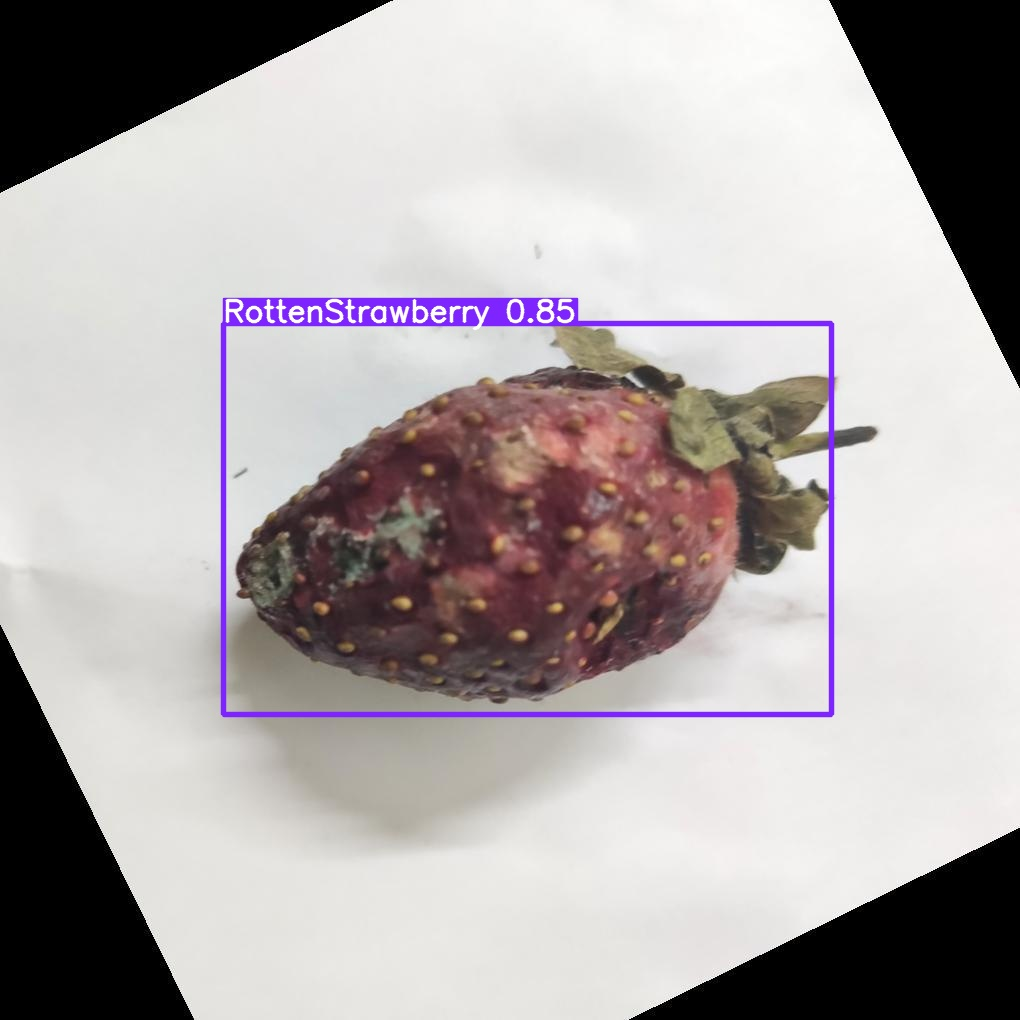

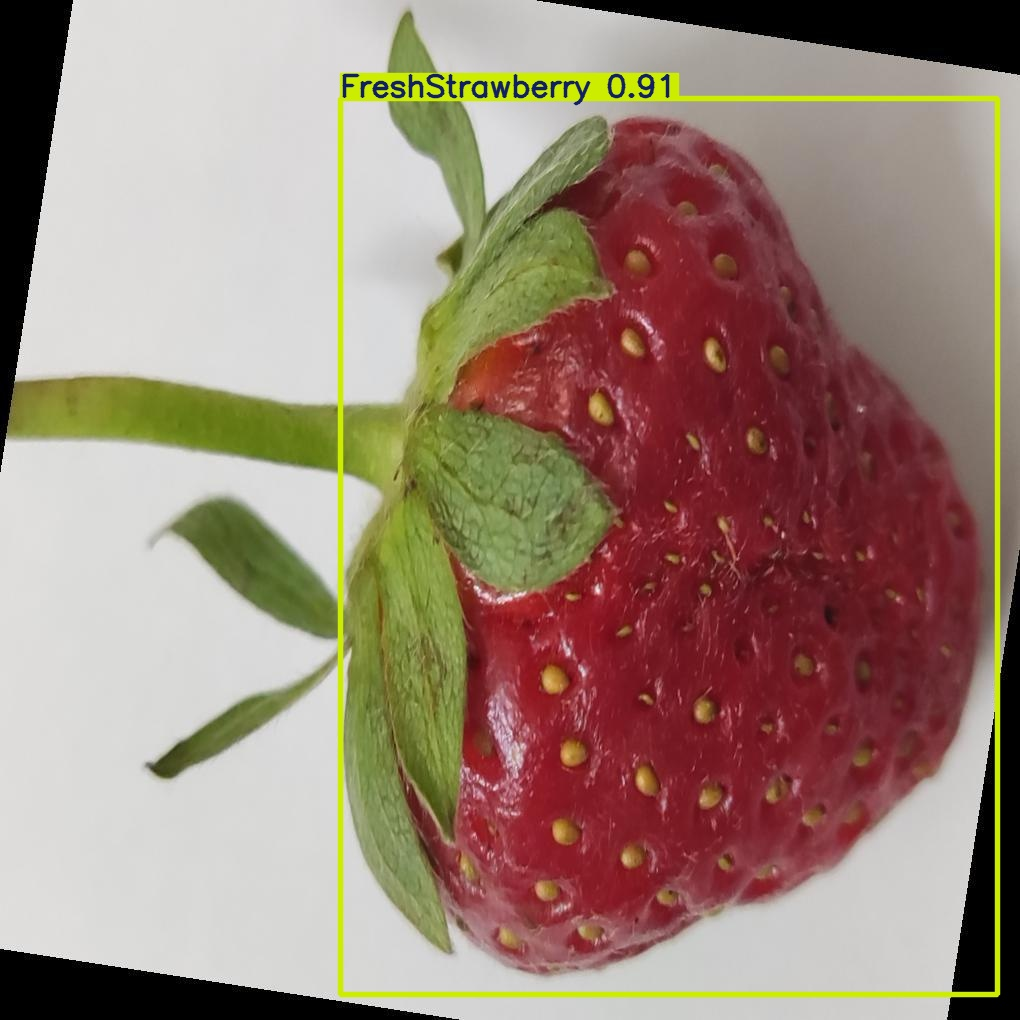

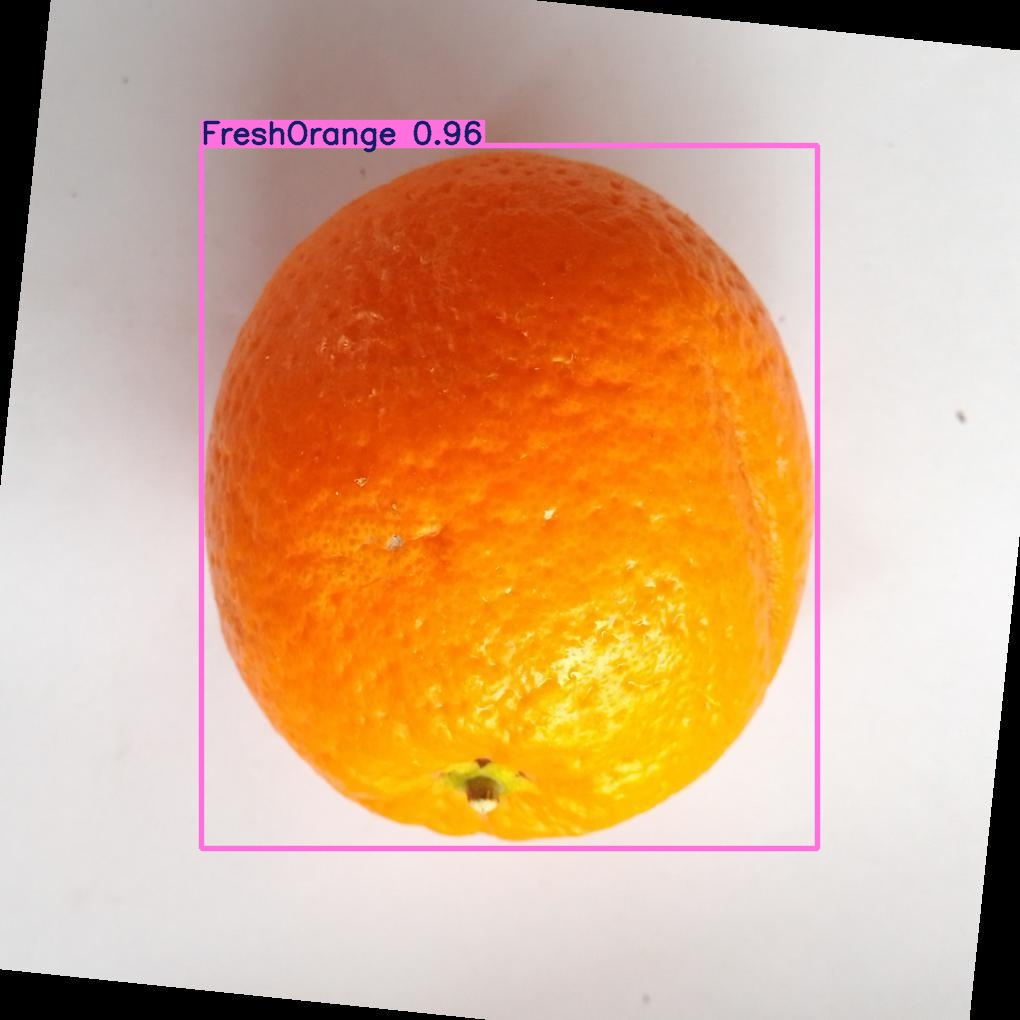

In [14]:
# take a look at few results
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
##in order to not run the epochs again and again, download the file named "best.pt"